In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats
import scipy
from scipy import *
from sompy.sompy import SOMFactory
from sompy.visualization.mapview import View2D

In [67]:
data = pd.read_csv('data_clean.csv')

In [68]:
data.head(5)

,Unnamed: 0,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [69]:
data.describe()

,Unnamed: 0,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,996.000000,0.057521,0.463236,0.179649,0.753864,0.153638,0.143708,0.424180,0.493803,0.336232,...,0.215319,0.608946,0.535148,0.626563,0.651515,0.065208,0.232820,0.161741,0.093598,0.237858
std,575.473863,0.126898,0.163604,0.253504,0.244012,0.208921,0.232126,0.155225,0.143572,0.166540,...,0.230958,0.204365,0.181345,0.200476,0.198270,0.109482,0.203137,0.229099,0.239530,0.232980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,498.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,996.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,1494.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.280000,0.780000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1992.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
pd.crosstab(data['numbUrban'], data['ViolentCrimesPerPop']).head(5)

ViolentCrimesPerPop,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.88,0.89,0.9,0.91,0.93,0.94,0.95,0.96,0.97,1.0
numbUrban,,,,,,,,,,,,,,,,,,,,,
0.00,7,12,21,26,24,23,21,22,16,18,...,0,0,1,2,1,0,0,1,0,5
0.01,0,2,4,5,5,3,3,1,1,4,...,0,0,0,0,0,0,0,0,0,0
0.02,2,12,26,33,25,19,23,14,14,14,...,0,0,0,0,0,0,0,0,0,2
0.03,1,6,12,16,11,16,10,8,9,6,...,0,0,0,0,0,0,0,0,0,2
0.04,0,3,1,9,14,6,5,4,7,5,...,0,0,0,0,0,0,0,0,1,3


In [134]:
#Cramer test
chi2 = scipy.stats.chi2_contingency(pd.crosstab(data['racepctblack'], data['ViolentCrimesPerPop']))
chi2 = chi2[0]
N = len(data['numbUrban'])
c = shape(pd.crosstab(data['racepctblack'], data['ViolentCrimesPerPop']))[0]
r = shape(pd.crosstab(data['racepctblack'], data['ViolentCrimesPerPop']))[1]
Min = min((c-1), (r-1))

V = np.sqrt(chi2/(N*Min))
print(V)

0.3137677440159305


In [72]:
data['ViolentCrimesPerPop'].describe()

count    1993.000000
mean        0.237858
std         0.232980
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

In [73]:
data['LemasPctOfficDrugUn']

0       0.32
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6       0.00
7       0.00
8       0.00
9       0.00
10      0.00
11      0.00
12      0.00
13      0.00
14      0.00
15      0.00
16      0.88
17      0.00
18      0.00
19      0.00
20      0.76
21      0.31
22      0.00
23      0.56
24      0.00
25      0.00
26      0.00
27      0.00
28      0.00
29      0.00
        ... 
1963    0.37
1964    0.00
1965    0.44
1966    0.00
1967    0.00
1968    0.00
1969    0.64
1970    0.00
1971    0.00
1972    0.00
1973    0.00
1974    0.00
1975    0.00
1976    0.00
1977    0.00
1978    0.00
1979    0.00
1980    0.00
1981    0.62
1982    0.00
1983    0.00
1984    0.00
1985    0.00
1986    0.00
1987    0.00
1988    0.00
1989    0.00
1990    0.00
1991    0.91
1992    0.22
Name: LemasPctOfficDrugUn, Length: 1993, dtype: float64

In [74]:
#Cramer test
chi2 = scipy.stats.chi2_contingency(pd.crosstab(data['population'], data['NumUnderPov']))
chi2 = chi2[0]
N = len(data['population'])
c = shape(pd.crosstab(data['population'], data['NumUnderPov']))[0]
r = shape(pd.crosstab(data['population'], data['NumUnderPov']))[1]
Min = min((c-1), (r-1))

V = np.sqrt(chi2/(N*Min))
print(V)

0.600233482625903


In [75]:
result = 0
for i in range(0, len (data)):
    result = data['population'][i]+result
result

114.64000000000073

In [76]:
n = []
for i in range(0, len(data)):
    newPop = (data['population'][i]/114.64)*100
    n.append(newPop)
    newPop = 0
n

[0.16573621772505234,
 0.0,
 0.0,
 0.034891835310537335,
 0.008722958827634334,
 0.017445917655268667,
 0.008722958827634334,
 0.008722958827634334,
 0.026168876482903003,
 0.008722958827634334,
 0.11339846475924634,
 0.017445917655268667,
 0.026168876482903003,
 0.008722958827634334,
 0.034891835310537335,
 0.026168876482903003,
 0.130844382414515,
 0.008722958827634334,
 0.017445917655268667,
 0.0,
 0.21807397069085835,
 0.8722958827634334,
 0.008722958827634334,
 0.09595254710397766,
 0.017445917655268667,
 0.0,
 0.052337752965806006,
 0.008722958827634334,
 0.008722958827634334,
 0.0,
 0.008722958827634334,
 0.2529658060013957,
 0.034891835310537335,
 0.078506629448709,
 0.026168876482903003,
 0.16573621772505234,
 0.026168876482903003,
 0.008722958827634334,
 0.017445917655268667,
 0.008722958827634334,
 0.008722958827634334,
 0.052337752965806006,
 0.0,
 0.078506629448709,
 0.017445917655268667,
 0.10467550593161201,
 0.026168876482903003,
 0.0,
 0.034891835310537335,
 0.00872295

In [77]:
result = 0
for i in range(0, len (data)):
    result = n[i]+result
result

99.9999999999989

In [91]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
import pydotplus
import collections
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils

In [166]:
data['TotalPctDiv'].describe()

count    1993.000000
mean        0.494235
std         0.183645
min         0.000000
25%         0.360000
50%         0.500000
75%         0.630000
max         1.000000
Name: TotalPctDiv, dtype: float64

In [152]:
Div = pd.DataFrame(data = training_scores_encoded_div, columns = ['Div'])
Black = pd.DataFrame(data = training_scores_encoded_black, columns = ['Black'])
Illeg = pd.DataFrame(data = training_scores_encoded_illeg, columns = ['Illeg'])
test = pd.concat([Div, Black], axis = 1)


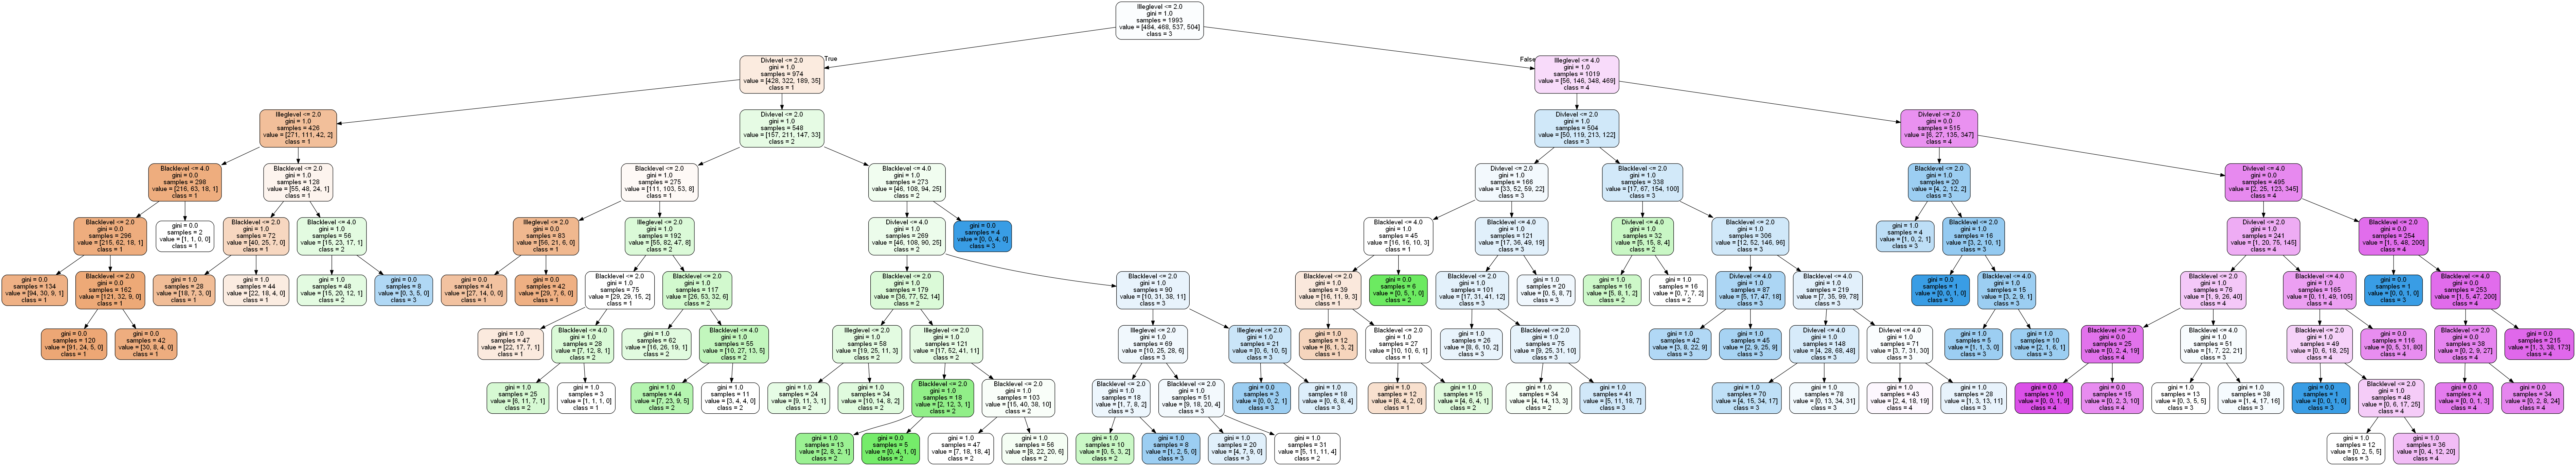

In [171]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(racism[['Illeglevel', 'Blacklevel', 'Divlevel']],racism['Crimelevel'])
data_feature_names=['Illeglevel', 'Blacklevel', 'Divlevel']

dot_data=tree.export_graphviz(clf,out_file=None,
                              feature_names =data_feature_names,class_names = ["1", "2", "3", "4"],
                              filled=True,rounded =True,precision=0)

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#Image(graph.write_png('./decisiontree.png'))

In [167]:
Crimelevel = []
for i in data['ViolentCrimesPerPop']:
    if (0 <= i < 0.07) :
        Crimelevel.append(1)
    elif (0.07 <= i < 0.15):
        Crimelevel.append(2)
    elif (0.15 <= i < 0.33) :
        Crimelevel.append(3)
    else :
        Crimelevel.append(4)
crimelevel = pd.DataFrame(data = Crimelevel, columns = ['Crimelevel'])

Illeglevel = []
for i in data['PctIlleg']:
    if (0 <= i < 0.09) :
        Illeglevel.append(1)
    elif (0.09 <= i < 0.17):
        Illeglevel.append(2)
    elif (0.17 <= i < 0.32) :
        Illeglevel.append(3)
    else :
        Illeglevel.append(4)        
illeglevel = pd.DataFrame(data = Illeglevel, columns = ['Illeglevel'])

Blacklevel = []
for i in data['racepctblack']:
    if (0 <= i < 0.02) :
        Blacklevel.append(1)
    elif (0.02 <= i < 0.06):
        Blacklevel.append(2)
    elif (0.06 <= i < 0.23) :
        Blacklevel.append(3)
    else :
        Blacklevel.append(4) 
blacklevel = pd.DataFrame(data = Blacklevel, columns = ['Blacklevel'])

Div = []
for i in data['TotalPctDiv']:
    if (0 <= i < 0.36) :
        Div.append(1)
    elif (0.36 <= i < 0.50):
        Div.append(2)
    elif (0.50 <= i < 0.63) :
        Div.append(3)
    else :
        Div.append(4) 
divlevel = pd.DataFrame(data = Div, columns = ['Divlevel'])

In [163]:
racism = pd.concat([blacklevel, illeglevel, crimelevel], axis = 1)

In [286]:
racism.head()
racism2 = racism.copy()
racism2 = racism2.drop(columns = ['Crimelevel'])

,Blacklevel,Illeglevel,Divlevel
0,2,2,4
1,3,3,4
2,4,4,4
3,4,4,2
4,2,1,1
5,3,2,3
6,1,2,1
7,2,4,3
8,3,3,4
9,3,1,2


In [174]:
data.head()

,Unnamed: 0,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [175]:
X = data.iloc[:,0:100].values
y = data.iloc[:,100].values

#Standardize
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

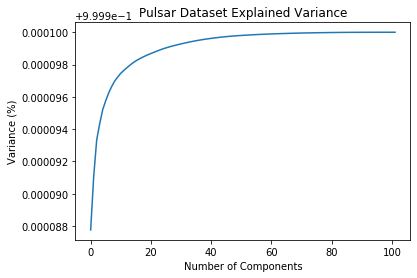

In [222]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

array([ 3.21844227, -4.70402972, -0.44067603,  2.17461204, -0.22591359,
        0.23995201,  0.16392603, -0.82915468, -0.85564822,  2.06499213,
        0.46929503, -2.23312379,  0.62826355, -0.32268754])

In [178]:
c = 14
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))

Amount of variance: [25.41362646 17.46753764  9.32980762  7.80643213  5.67899967  4.16313504
  3.26986915  2.87307807  2.10256241  1.6025568   1.50928911  1.45866046
  1.34968888  1.05770602]
Sum of the variance: 85.08
Percentage of variance: [0.25038821 0.17209923 0.0919221  0.07691301 0.05595245 0.04101736
 0.03221644 0.02830705 0.02071553 0.01578922 0.0148703  0.01437148
 0.01329783 0.01042107]
Sum of the percentage of variance: 0.84


In [214]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import model_selection

seed = 42

In [225]:
n_lambdas = 200
Lambdas = np.logspace(-5, 5, n_lambdas)

ridge = linear_model.Ridge()

coefs = []
errors = []
for l in Lambdas:
    ridge.set_params(alpha=l)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append(metrics.mean_squared_error(ridge.predict(X_test), y_test))
    
print('MSE min :', round(min(errors), 4))

MSE min : 0.041


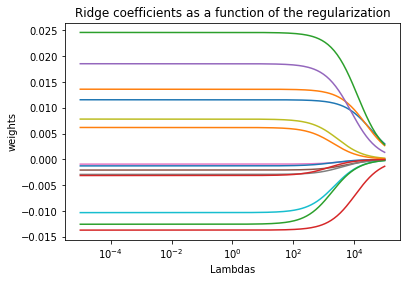

In [226]:
ax = plt.gca()

ax.plot(Lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

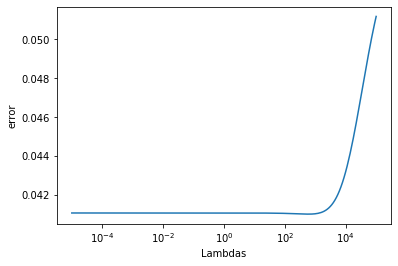

In [227]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('error')
plt.show()

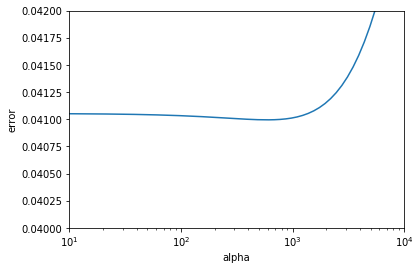

In [232]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.ylim(0.040, 0.042)
plt.xlim(1e1, 1e4)
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

In [233]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

for train_index, test_index in kf.split(X_train_std):
    print("TRAIN:", "taille", len(train_index), ", 5ers indices", train_index[0:5], 
          "|| TEST:", "taille", len(test_index), ", 5ers indices", test_index[0:5])

TRAIN: taille 1116 , 5ers indices [0 1 2 3 4] || TEST: taille 279 , 5ers indices [23 29 30 31 32]
TRAIN: taille 1116 , 5ers indices [0 1 2 4 6] || TEST: taille 279 , 5ers indices [ 3  5 10 12 39]
TRAIN: taille 1116 , 5ers indices [1 3 4 5 8] || TEST: taille 279 , 5ers indices [0 2 6 7 9]
TRAIN: taille 1116 , 5ers indices [0 1 2 3 5] || TEST: taille 279 , 5ers indices [ 4 11 15 17 18]
TRAIN: taille 1116 , 5ers indices [0 2 3 4 5] || TEST: taille 279 , 5ers indices [ 1  8 13 14 16]


In [234]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha': Lambdas}

# Choisir un score à optimiser, ici la MSE
score = 'neg_mean_squared_error'

# Créer une régression Ridge avec recherche d'hyperparamètre par validation croisée
reg = model_selection.GridSearchCV(linear_model.Ridge(), # régression Ridge
                                    param_grid, # hyperparamètres à tester
                                    cv=kf, # folds pour la validation croisée
                                    scoring=score # score à optimiser
                                    )

# Optimiser la régression sur le jeu d'entraînement
reg.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(reg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(reg.cv_results_['mean_test_score'], # score moyen
                                reg.cv_results_['std_test_score'], # écart-type du score
                                reg.cv_results_['params'] # valeur de l'hyperparamètre
                                ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
                                                mean, # score moyen
                                                std * 2, # barre d'erreur
                                                params # hyperparamètre
                                                ))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 54.15871378079476}
Résultats de la validation croisée :
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 1e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 1.1226677735108135e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 1.2603829296797274e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 1.414991297434576e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 1.588565129428053e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 1.7834308769319092e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 2.0022003718155845e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 2.2478058335487252e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 2.523539170434766e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 2.833096101839324e-05}
	neg_mean_squared_error = -0.043 (+/-0.012) for {'alpha': 3.180625692794119e-0

In [235]:

n_lambdas = 300
Lambdas = np.logspace(-5, 1, n_lambdas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for l in Lambdas:
    lasso.set_params(alpha=l)
    lasso.fit(X_train_std, y_train_std)
    coefs.append(lasso.coef_)
    errors.append(metrics.mean_squared_error(lasso.predict(X_test_std), y_test_std))
    
print('MSE min :', round(min(errors), 3))

MSE min : 0.041


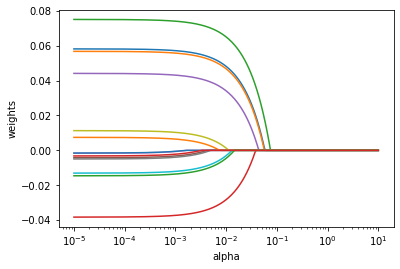

In [236]:
ax = plt.gca()

ax.plot(Lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

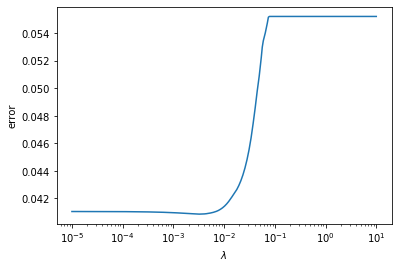

In [237]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [238]:
min(errors)

0.040863326961928986

In [239]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha': Lambdas}

# Choisir un score à optimiser, ici la MSE
score = 'neg_mean_squared_error'

# Créer une régression Lasso avec recherche d'hyperparamètre par validation croisée
reg = model_selection.GridSearchCV(linear_model.Lasso(fit_intercept=False), # régression Lasso
                                    param_grid, # hyperparamètres à tester
                                    cv=kf, # folds pour la validation croisée
                                    scoring=score # score à optimiser
                                    )

# Optimiser la régression sur le jeu d'entraînement
reg.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(reg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(reg.cv_results_['mean_test_score'], # score moyen
                                reg.cv_results_['std_test_score'], # écart-type du score
                                reg.cv_results_['params'] # valeur de l'hyperparamètre
                                ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
                                                mean, # score moyen
                                                std * 2, # barre d'erreur
                                                params # hyperparamètre
                                                ))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 0.0038781871456107235}
Résultats de la validation croisée :
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.0472898382363595e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.096816005273138e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.1486842567375548e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.2030053494233242e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.2598952777950285e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.3194755216767059e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.3818733056536336e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.4472218707411344e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.5156607589006043e-05}
	neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 1.58733611101

In [330]:
names = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']
names2 = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'Crimelevel']
len(names)

14

In [341]:
X_traincp = X_train.copy()
xtraincp = pd.DataFrame(data = X_traincp, columns = names)
Xtrainrace = pd.concat([xtraincp, racism['Crimelevel']], axis = 1)
bordel = Xtrainrace.dropna()

neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 0.0038781871456107235}

In [345]:
new = SOMFactory().build(bordel.values, mapsize = (10,10), component_names = names2, neighborhood = 'gaussian', training = 'batch')
new.train(n_job = 1, shared_memory = False, verbose = None)

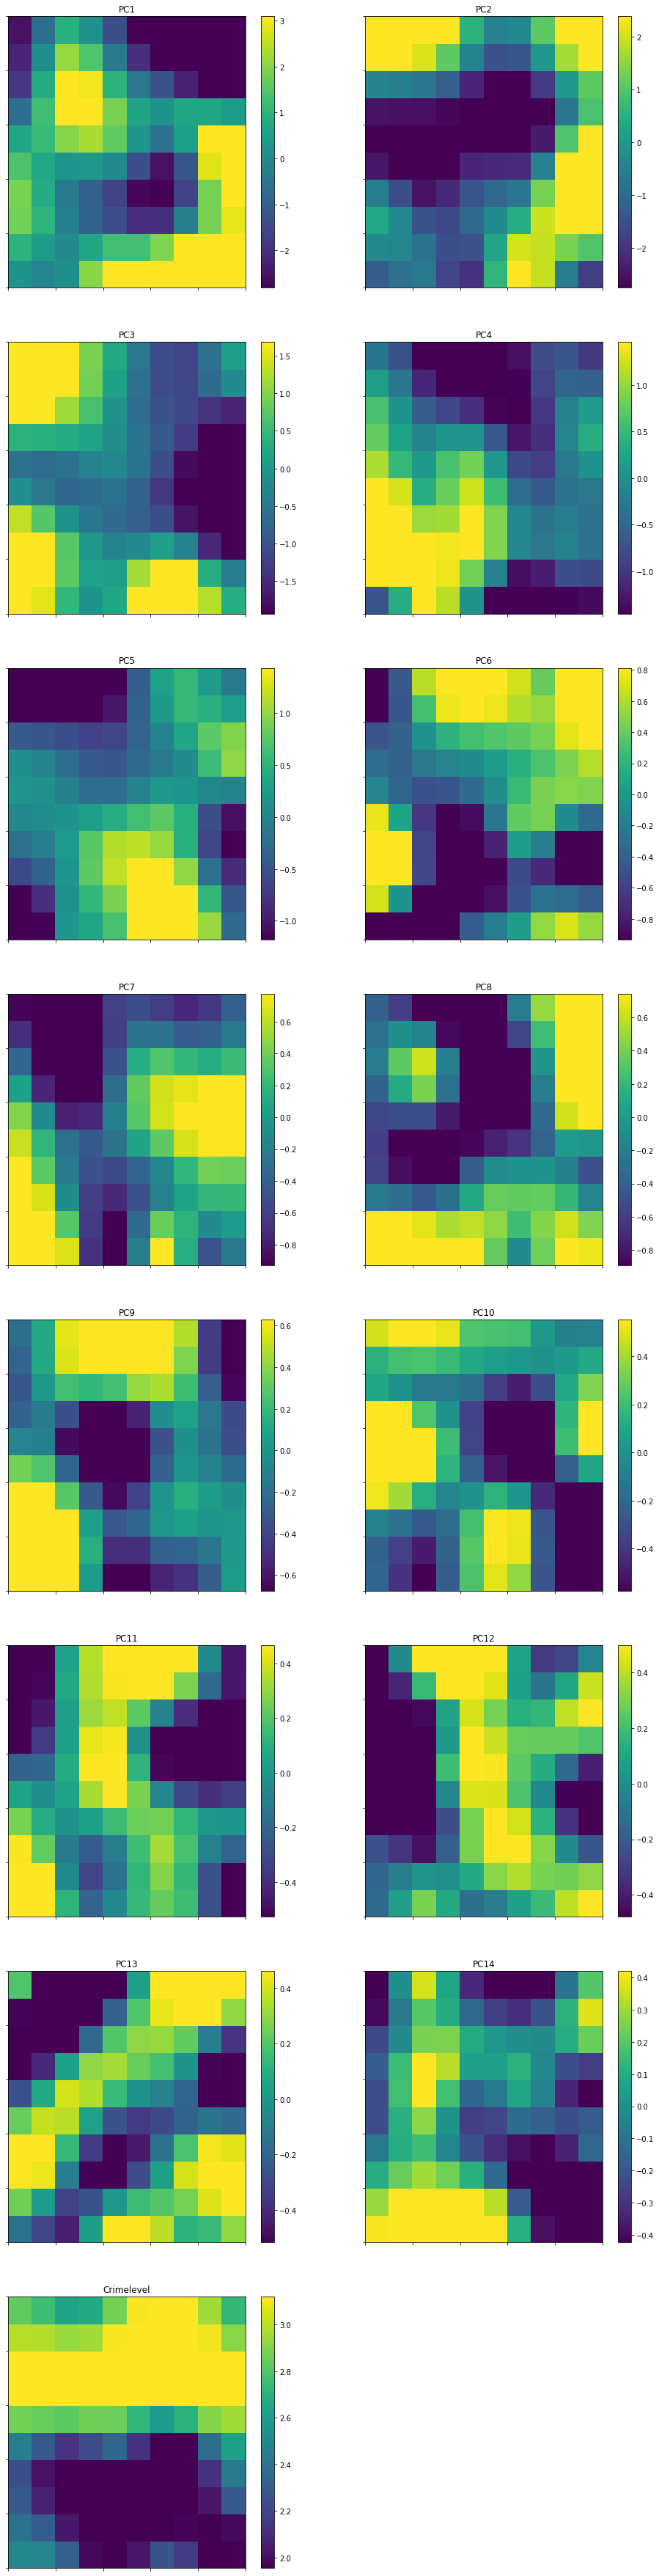

In [346]:
view2D = View2D(10, 10, " ", text_size=10)
view2D.show(new, col_sz=2, which_dim="all", denormalize=True)

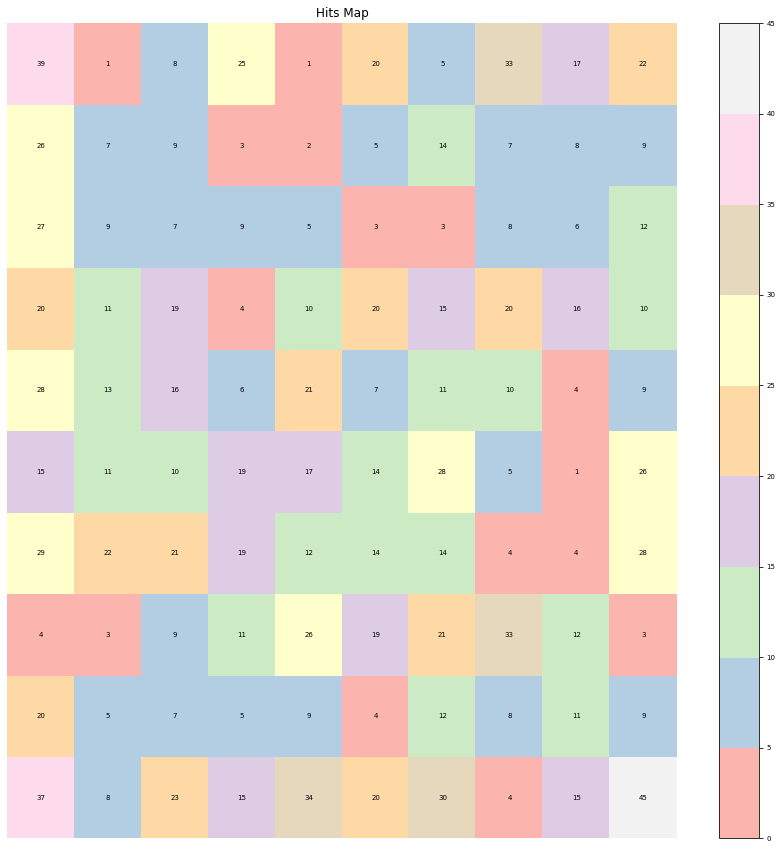

In [316]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(15,15,"Hits Map",text_size=7)
vhts.show(new, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1", logaritmic=False)
plt.show()

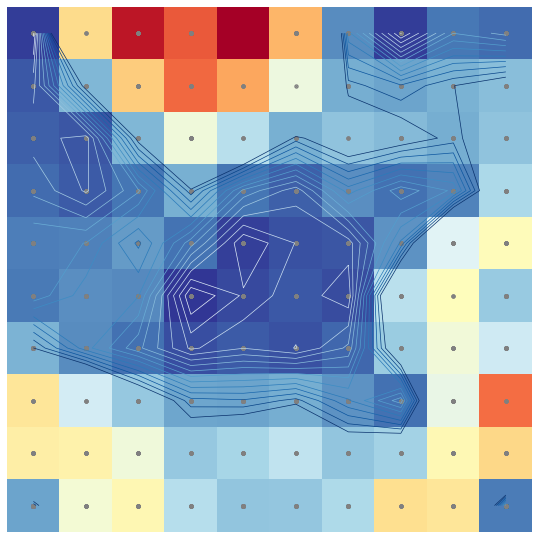

In [317]:
from sompy.visualization.umatrix import UMatrixView

UMts = UMatrixView(20, 20, " ")
UMts.show(new)
plt.show()

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)